<a href="https://colab.research.google.com/github/deedeeharris/MS_Research_Projects/blob/main/2_Stress/stress_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irrigation Failure Analysis

Yedidya Harris, 13/04/2023

## Li-600 (Porometer) analysis

##### helper functions and file paths

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import relevant libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = r'/content/drive/MyDrive/LabFiles/data'
plant_ids_data =  r'/content/drive/MyDrive/LabFiles/data/frostroom2/plantsID.xlsx'

In [3]:
# Function to read and clean LI-COR LI-600 CSV files
def csv_li600_to_df(csv_filepath):
  # Read CSV file into a DataFrame
  df = pd.read_csv(csv_filepath)

  # set column names to first row values
  df.columns = df.iloc[0]
  df = df[0:]

  # Drop the first and second rows
  df = df.drop([0,1])

  # Select the desired columns
  df = df[['Plant ID', 'Time', 'Date', 'gsw', 'E_apparent', 'Tleaf', 'Qamb']]

  # Convert the 'gsw', 'E_apparent', 'Tleaf', and 'Qamb' columns to numeric
  numeric_cols = ['Plant ID', 'gsw', 'E_apparent', 'Tleaf', 'Qamb']
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

  # Combine the 'Date' and 'Time' columns and convert to a datetime
  datetime_col = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
  df['Timestamp'] = datetime_col


  # Drop the original 'Date' and 'Time' columns
  df = df.drop(['Date', 'Time'], axis=1)

  # rename cols
  df = df.rename(columns={
      'Plant ID': 'Plant ID',
      'Timestamp': 'Timestamp',
      'gsw': 'Stomatal Conductance (mol/m²/s)',
      'E_apparent': 'Transpiration  (mmol/m²/s)',
      'Tleaf': 'Leaf Temperature (°C)',
      'Qamb': 'PAR (µmol/m²/s)'
  })
  return df


In [4]:
def merge_csv_files_to_df(csv_filepaths):
    dfs = []
    for filepath in csv_filepaths:
      df = csv_li600_to_df(filepath)
      dfs.append(df)
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


### Stress Days 29-30/03/2023

In [ ]:
# paths
current_licor_folder = r'/content/drive/MyDrive/LabFiles/data/frostroom2/stressdays_2930_03_2023/licor'
licor_file_day1 = f'{current_licor_folder}/LICOR_29032023_frostroom_C_T1_T4.csv'

In [ ]:
# read and clean our licor files
csv_file_paths = [licor_file_day1]
df = merge_csv_files_to_df(csv_file_paths)
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s),Timestamp
0,1,0.523019,4.491076,21.76,643,2023-03-29 09:38:33
1,1,0.506124,4.925668,22.69,600,2023-03-29 09:39:00
2,1,0.489590,4.628263,22.58,647,2023-03-29 09:39:18
3,1,0.577256,5.218382,22.86,724,2023-03-29 09:39:37
4,2,0.477084,4.634845,23.16,491,2023-03-29 09:40:00
...,...,...,...,...,...,...
199,55,0.629865,5.830357,27.23,1209,2023-03-29 13:20:35
200,55,0.801385,5.679715,26.29,420,2023-03-29 13:21:38
201,55,0.811505,5.651643,26.18,606,2023-03-29 13:22:01
202,55,0.604267,5.286377,26.82,1035,2023-03-29 13:22:21


In [ ]:
# read in plant id df
df_ids = pd.read_excel(plant_ids_data, dtype=object)
df_ids['Plant ID'] = df_ids['Plant ID'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_ids.columns

Index(['Plant ID', 'Variety', 'Treatment'], dtype='object')

In [ ]:
# map the details from df_ids to df based on plant id
df['Treatment'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df['Variety'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])


In [ ]:
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s),Timestamp,Treatment,Variety
0,1,0.523019,4.491076,21.76,643,2023-03-29 09:38:33,T1,Mohammed
1,1,0.506124,4.925668,22.69,600,2023-03-29 09:39:00,T1,Mohammed
2,1,0.489590,4.628263,22.58,647,2023-03-29 09:39:18,T1,Mohammed
3,1,0.577256,5.218382,22.86,724,2023-03-29 09:39:37,T1,Mohammed
4,2,0.477084,4.634845,23.16,491,2023-03-29 09:40:00,T1,Mohammed
...,...,...,...,...,...,...,...,...
199,55,0.629865,5.830357,27.23,1209,2023-03-29 13:20:35,T4,Hahms Gelbe
200,55,0.801385,5.679715,26.29,420,2023-03-29 13:21:38,T4,Hahms Gelbe
201,55,0.811505,5.651643,26.18,606,2023-03-29 13:22:01,T4,Hahms Gelbe
202,55,0.604267,5.286377,26.82,1035,2023-03-29 13:22:21,T4,Hahms Gelbe


In [ ]:
df.columns

Index(['Plant ID', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Temperature (°C)',
       'PAR (µmol/m²/s)', 'Timestamp', 'Treatment', 'Variety'],
      dtype='object', name=0)

In [ ]:
df_ana = df[['Plant ID', 'Variety', 'Treatment', 'Timestamp', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Temperature (°C)',
       'PAR (µmol/m²/s)']].copy()

df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s)
0,1,Mohammed,T1,2023-03-29 09:38:33,0.523019,4.491076,21.76,643
1,1,Mohammed,T1,2023-03-29 09:39:00,0.506124,4.925668,22.69,600
2,1,Mohammed,T1,2023-03-29 09:39:18,0.489590,4.628263,22.58,647
3,1,Mohammed,T1,2023-03-29 09:39:37,0.577256,5.218382,22.86,724
4,2,Mohammed,T1,2023-03-29 09:40:00,0.477084,4.634845,23.16,491
...,...,...,...,...,...,...,...,...
199,55,Hahms Gelbe,T4,2023-03-29 13:20:35,0.629865,5.830357,27.23,1209
200,55,Hahms Gelbe,T4,2023-03-29 13:21:38,0.801385,5.679715,26.29,420
201,55,Hahms Gelbe,T4,2023-03-29 13:22:01,0.811505,5.651643,26.18,606
202,55,Hahms Gelbe,T4,2023-03-29 13:22:21,0.604267,5.286377,26.82,1035


In [ ]:
# Divide each measurement in the 'gsw' and 'E_apparent' columns by the corresponding 'Qamb' value
df_ana['Stomatal Conductance/PAR'] = df_ana['Stomatal Conductance (mol/m²/s)'] / df_ana['PAR (µmol/m²/s)']
df_ana['Transpiration/PAR'] = df_ana['Transpiration  (mmol/m²/s)'] / df_ana['PAR (µmol/m²/s)']
df_ana['Leaf Temperature/PAR'] = df_ana['Leaf Temperature (°C)'] / df_ana['PAR (µmol/m²/s)']



In [ ]:
df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s),Stomatal Conductance/PAR,Transpiration/PAR,Leaf Temperature/PAR
0,1,Mohammed,T1,2023-03-29 09:38:33,0.523019,4.491076,21.76,643,0.000813,0.006985,0.033841
1,1,Mohammed,T1,2023-03-29 09:39:00,0.506124,4.925668,22.69,600,0.000844,0.008209,0.037817
2,1,Mohammed,T1,2023-03-29 09:39:18,0.489590,4.628263,22.58,647,0.000757,0.007153,0.034900
3,1,Mohammed,T1,2023-03-29 09:39:37,0.577256,5.218382,22.86,724,0.000797,0.007208,0.031575
4,2,Mohammed,T1,2023-03-29 09:40:00,0.477084,4.634845,23.16,491,0.000972,0.009440,0.047169
...,...,...,...,...,...,...,...,...,...,...,...
199,55,Hahms Gelbe,T4,2023-03-29 13:20:35,0.629865,5.830357,27.23,1209,0.000521,0.004822,0.022523
200,55,Hahms Gelbe,T4,2023-03-29 13:21:38,0.801385,5.679715,26.29,420,0.001908,0.013523,0.062595
201,55,Hahms Gelbe,T4,2023-03-29 13:22:01,0.811505,5.651643,26.18,606,0.001339,0.009326,0.043201
202,55,Hahms Gelbe,T4,2023-03-29 13:22:21,0.604267,5.286377,26.82,1035,0.000584,0.005108,0.025913


In [ ]:
# Group the data by plant ID and timestamp
df_ana_grouped = df_ana.groupby(['Plant ID', pd.Grouper(key='Timestamp', freq='D')])

# Calculate the mean of each x-hour period for the two normalized columns
df_ana_norm_mean = df_ana_grouped[['Stomatal Conductance/PAR', 'Transpiration/PAR', 'Leaf Temperature/PAR']].mean()

# Reset the index to make the timestamp a column again
df_ana_norm_mean = df_ana_norm_mean.reset_index()

# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)

In [ ]:
# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)

# map the details from df_ids to df based on plant id
df_ana_norm_mean['Treatment'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df_ana_norm_mean['Variety'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])

In [ ]:
df_ana_norm_mean

,Plant ID,Timestamp,Stomatal Conductance/PAR,Transpiration/PAR,Leaf Temperature/PAR,Treatment,Variety
0,1,2023-03-29,0.001894,0.014133,0.089624,T1,Mohammed
1,2,2023-03-29,0.001792,0.013479,0.082405,T1,Mohammed
2,3,2023-03-29,0.002200,0.014969,0.110083,T1,Mohammed
3,4,2023-03-29,0.000484,0.004096,0.028252,T1,Mohammed
4,5,2023-03-29,0.000717,0.005072,0.026099,T1,Mohammed
5,6,2023-03-29,0.003658,0.025104,0.130223,T1,Hahms Gelbe
6,7,2023-03-29,0.002676,0.016677,0.097603,T1,Hahms Gelbe
7,8,2023-03-29,0.000864,0.006292,0.045720,T1,Hahms Gelbe
8,9,2023-03-29,0.000833,0.006476,0.030806,T1,Hahms Gelbe
9,10,2023-03-29,0.001201,0.009349,0.048047,T1,Hahms Gelbe


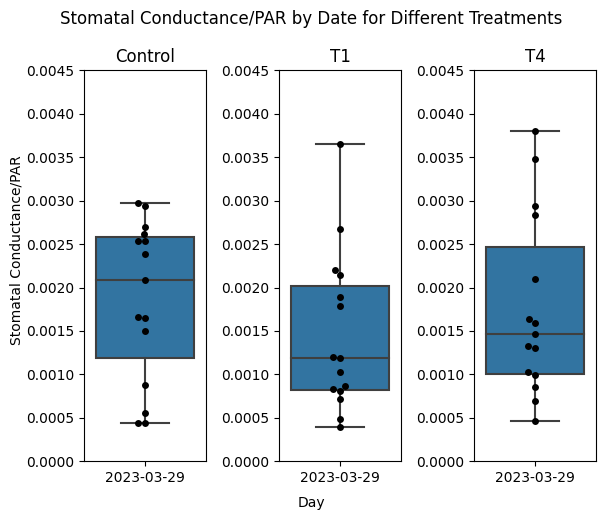

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# get unique treatments
treatments = sorted(df_ana_norm_mean.Treatment.unique())

# create subplot with the number of treatments as columns
fig, axs = plt.subplots(nrows=1, ncols=len(treatments), figsize=(2*len(treatments), 5))

# loop through treatments and create subplots
for i, treatment in enumerate(treatments):
  
  # filter data by treatment
  df_t = df_ana_norm_mean.copy().loc[df_ana_norm_mean['Treatment'] == treatment]

  # convert timestamp to date only
  df_t['Timestamp'] = pd.to_datetime(df_t['Timestamp']).dt.date

  # create boxplot and swarmplot in the corresponding subplot
  sns.boxplot(x='Timestamp', y='Stomatal Conductance/PAR', data=df_t, ax=axs[i])
  sns.swarmplot(x='Timestamp', y='Stomatal Conductance/PAR', data=df_t, color='black', ax=axs[i])
  axs[i].set_xticklabels(df_t['Timestamp'].unique()) #,rotation=90
  axs[i].set_title(f'{treatment}')
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')
  axs[i].set_ylim(0, 0.0045)

#add a general xy-axis label
fig.text(0.01, 0.5, 'Stomatal Conductance/PAR', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.02, 'Day', ha='center', va='bottom')


#add a general title for the entire figure
fig.suptitle('Stomatal Conductance/PAR by Date for Different Treatments')

# adjust subplot spacing
fig.tight_layout()

# show plot
plt.show()


In [ ]:
# grouped by treatment
df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance/PAR', 'Transpiration/PAR'].mean().reset_index()
df_treatment_mean_sorted = df_treatment_mean.sort_values(by='Timestamp')

df_treatment_mean_sorted

<ipython-input-19-4a110a7b346e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance/PAR', 'Transpiration/PAR'].mean().reset_index()


,Treatment,Timestamp,Stomatal Conductance/PAR,Transpiration/PAR
0,Control,2023-03-29,0.001859,0.013018
1,T1,2023-03-29,0.001459,0.010643
2,T4,2023-03-29,0.001766,0.012469


In [ ]:
df_means_29032023 = df_treatment_mean_sorted.copy()


In [ ]:
df_means_29032023

,Treatment,Timestamp,Stomatal Conductance/PAR,Transpiration/PAR
0,Control,2023-03-29,0.001859,0.013018
1,T1,2023-03-29,0.001459,0.010643
2,T4,2023-03-29,0.001766,0.012469


### **Stress Days 17-19/04/2023**

##### Preperations

In [197]:
#@title Define CSV files { display-mode: "form" }
# paths for 02-04/04/2023
# current_licor_folder = r'/content/drive/MyDrive/LabFiles/data/frostroom2/2stressdays_0203_04_2023/licor'
# licor_file_day0 = r'/content/drive/MyDrive/LabFiles/data/frostroom2/2stressdays_2930_03_2023/licor/LICOR_29032023_frostroom_C_T1_T4.csv'
# licor_file_day1 = f'{current_licor_folder}/LICOR_02042023_frostroom_C_T1_T4.csv'
# licor_file_day2 = f'{current_licor_folder}/LICOR_03042023_frostroom_C_T1_T4.csv'
# licor_file_day3 = f'{current_licor_folder}/LICOR_04042023_frostroom_C_T1_T4.csv'

# paths for 17-19/04/2023
current_licor_folder = r'/content/drive/MyDrive/LabFiles/data/frostroom2/3stressdays_1719_04_2023/licor'
licor_file_day1 = f'{current_licor_folder}/LICOR_17042023_frostroom_C_T1_T4.csv'
licor_file_day2 = f'{current_licor_folder}/LICOR_18042023_frostroom_C_T1_T4.csv'
licor_file_day3 = f'{current_licor_folder}/LICOR_19042023_frostroom_C_T1_T4.csv'

In [198]:
#@title Read and prepare the df { display-mode: "form" }
# read and clean our licor files
csv_file_paths = [licor_file_day1, licor_file_day2, licor_file_day3]
df = merge_csv_files_to_df(csv_file_paths)
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s),Timestamp
0,1,0.417555,4.475271,27.06,924,2023-04-17 09:54:30
1,1,0.403289,4.338496,26.96,904,2023-04-17 09:54:47
2,1,0.414945,4.160928,26.64,832,2023-04-17 09:55:06
3,2,0.172935,2.673614,28.17,949,2023-04-17 09:55:25
4,2,0.103912,1.556845,27.43,954,2023-04-17 09:55:40
...,...,...,...,...,...,...
456,73,0.589886,4.755767,25.60,499,2023-04-19 13:42:43
457,74,0.505381,4.263937,24.87,600,2023-04-19 13:43:07
458,74,0.474647,4.076942,24.91,591,2023-04-19 13:43:26
459,75,0.657155,5.291321,25.29,606,2023-04-19 13:43:40


In [199]:
#@title Map Treatment+Variety according to Plant ID { display-mode: "form" }

# read in plant id df
df_ids = pd.read_excel(plant_ids_data, dtype=object)
df_ids['Plant ID'] = df_ids['Plant ID'].apply(pd.to_numeric, errors='coerce')

# map the details from df_ids to df based on plant id
df['Treatment'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df['Variety'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])

df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s),Timestamp,Treatment,Variety
0,1,0.417555,4.475271,27.06,924,2023-04-17 09:54:30,T1,Mohammed
1,1,0.403289,4.338496,26.96,904,2023-04-17 09:54:47,T1,Mohammed
2,1,0.414945,4.160928,26.64,832,2023-04-17 09:55:06,T1,Mohammed
3,2,0.172935,2.673614,28.17,949,2023-04-17 09:55:25,T1,Mohammed
4,2,0.103912,1.556845,27.43,954,2023-04-17 09:55:40,T1,Mohammed
...,...,...,...,...,...,...,...,...
456,73,0.589886,4.755767,25.60,499,2023-04-19 13:42:43,Control,Red Robin
457,74,0.505381,4.263937,24.87,600,2023-04-19 13:43:07,Control,Red Robin
458,74,0.474647,4.076942,24.91,591,2023-04-19 13:43:26,Control,Red Robin
459,75,0.657155,5.291321,25.29,606,2023-04-19 13:43:40,Control,Red Robin


In [200]:
#@title Choose specific cols for our analysis { display-mode: "form" }

df_ana = df[['Plant ID', 'Variety', 'Treatment', 'Timestamp', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Temperature (°C)',
       'PAR (µmol/m²/s)']].copy()

df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s)
0,1,Mohammed,T1,2023-04-17 09:54:30,0.417555,4.475271,27.06,924
1,1,Mohammed,T1,2023-04-17 09:54:47,0.403289,4.338496,26.96,904
2,1,Mohammed,T1,2023-04-17 09:55:06,0.414945,4.160928,26.64,832
3,2,Mohammed,T1,2023-04-17 09:55:25,0.172935,2.673614,28.17,949
4,2,Mohammed,T1,2023-04-17 09:55:40,0.103912,1.556845,27.43,954
...,...,...,...,...,...,...,...,...
456,73,Red Robin,Control,2023-04-19 13:42:43,0.589886,4.755767,25.60,499
457,74,Red Robin,Control,2023-04-19 13:43:07,0.505381,4.263937,24.87,600
458,74,Red Robin,Control,2023-04-19 13:43:26,0.474647,4.076942,24.91,591
459,75,Red Robin,Control,2023-04-19 13:43:40,0.657155,5.291321,25.29,606


In [201]:
#@title Normalizing according to the PAR { display-mode: "form" }


# Normalizing according to the PAR
df_ana['Stomatal Conductance/PAR'] = df_ana['Stomatal Conductance (mol/m²/s)'] / df_ana['PAR (µmol/m²/s)']
df_ana['Transpiration/PAR'] = df_ana['Transpiration  (mmol/m²/s)'] / df_ana['PAR (µmol/m²/s)']
df_ana['Leaf Temperature/PAR'] = df_ana['Leaf Temperature (°C)'] / df_ana['PAR (µmol/m²/s)']

df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),PAR (µmol/m²/s),Stomatal Conductance/PAR,Transpiration/PAR,Leaf Temperature/PAR
0,1,Mohammed,T1,2023-04-17 09:54:30,0.417555,4.475271,27.06,924,0.000452,0.004843,0.029286
1,1,Mohammed,T1,2023-04-17 09:54:47,0.403289,4.338496,26.96,904,0.000446,0.004799,0.029823
2,1,Mohammed,T1,2023-04-17 09:55:06,0.414945,4.160928,26.64,832,0.000499,0.005001,0.032019
3,2,Mohammed,T1,2023-04-17 09:55:25,0.172935,2.673614,28.17,949,0.000182,0.002817,0.029684
4,2,Mohammed,T1,2023-04-17 09:55:40,0.103912,1.556845,27.43,954,0.000109,0.001632,0.028753
...,...,...,...,...,...,...,...,...,...,...,...
456,73,Red Robin,Control,2023-04-19 13:42:43,0.589886,4.755767,25.60,499,0.001182,0.009531,0.051303
457,74,Red Robin,Control,2023-04-19 13:43:07,0.505381,4.263937,24.87,600,0.000842,0.007107,0.041450
458,74,Red Robin,Control,2023-04-19 13:43:26,0.474647,4.076942,24.91,591,0.000803,0.006898,0.042149
459,75,Red Robin,Control,2023-04-19 13:43:40,0.657155,5.291321,25.29,606,0.001084,0.008732,0.041733


In [202]:
#@title Grouping by Plant ID { display-mode: "form" }


# Group the data by plant ID and timestamp
df_ana_grouped = df_ana.groupby(['Plant ID', pd.Grouper(key='Timestamp')])

# Calculate the mean of each x-hour period for the two normalized columns
df_ana_norm_mean = df_ana_grouped[['Stomatal Conductance/PAR', 
                                   'Transpiration/PAR',
                                   'Stomatal Conductance (mol/m²/s)', 
                                   'Transpiration  (mmol/m²/s)',
                                   'Leaf Temperature (°C)',
                                   'Leaf Temperature/PAR',
                                   'PAR (µmol/m²/s)']].mean()

# Reset the index to make the timestamp a column again
df_ana_norm_mean = df_ana_norm_mean.reset_index()

# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)


# map the details from df_ids to df based on plant id
df_ana_norm_mean['Treatment'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df_ana_norm_mean['Variety'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])

df_ana_norm_mean

,Plant ID,Timestamp,Stomatal Conductance/PAR,Transpiration/PAR,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),Leaf Temperature/PAR,PAR (µmol/m²/s),Treatment,Variety
0,1,2023-04-17 09:54:30,0.000452,0.004843,0.417555,4.475271,27.06,0.029286,924.0,T1,Mohammed
19,1,2023-04-19 13:04:31,0.000441,0.005940,0.456969,6.159950,27.94,0.026943,1037.0,T1,Mohammed
18,1,2023-04-19 13:04:06,0.000424,0.005456,0.514749,6.628734,27.83,0.022905,1215.0,T1,Mohammed
17,1,2023-04-19 11:32:45,0.000310,0.004843,0.430030,6.726900,29.52,0.021253,1389.0,T1,Mohammed
16,1,2023-04-19 11:32:29,0.000525,0.006204,0.694212,8.207760,28.64,0.021648,1323.0,T1,Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
455,75,2023-04-17 13:47:20,0.000401,0.004409,0.517428,5.691415,27.10,0.020991,1291.0,Control,Red Robin
456,75,2023-04-18 13:58:44,0.000438,0.004719,0.495791,5.346960,26.80,0.023654,1133.0,Control,Red Robin
457,75,2023-04-18 13:58:58,0.000388,0.004245,0.472732,5.174163,26.76,0.021952,1219.0,Control,Red Robin
458,75,2023-04-18 13:59:11,0.000512,0.005389,0.538213,5.668962,26.87,0.025542,1052.0,Control,Red Robin


In [203]:
#@title grouping by treatment { display-mode: "form" }


# grouped by treatment
df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance/PAR', 'Transpiration/PAR'].mean().reset_index()
df_treatment_mean_sorted = df_treatment_mean.sort_values(by='Timestamp')

df_treatment_mean_sorted

<ipython-input-203-84080a8a99ca>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance/PAR', 'Transpiration/PAR'].mean().reset_index()


,Treatment,Timestamp,Stomatal Conductance/PAR,Transpiration/PAR
140,T1,2023-04-17 09:54:30,0.000452,0.004843
141,T1,2023-04-17 09:54:47,0.000446,0.004799
142,T1,2023-04-17 09:55:06,0.000499,0.005001
143,T1,2023-04-17 09:55:25,0.000182,0.002817
144,T1,2023-04-17 09:55:40,0.000109,0.001632
...,...,...,...,...
135,Control,2023-04-19 13:42:43,0.001182,0.009531
136,Control,2023-04-19 13:43:07,0.000842,0.007107
137,Control,2023-04-19 13:43:26,0.000803,0.006898
138,Control,2023-04-19 13:43:40,0.001084,0.008732


##### Statistics

In [191]:
#@title Stats Function (compare treatments for each day) { display-mode: "form" }

'''
Function for Conducting Statistical Tests on Data by Day


Short:
For normally distributed data, t-tests are used to compare the means of two groups. 
In this function, two t-tests are performed: one comparing the mean of group T1 to the mean of group T4, 
and another comparing the mean of the Control group to the mean of group T4.

For non-normally distributed data, the Kruskal-Wallis test is used to compare the medians of two or more groups. 
In this function, the Kruskal-Wallis test is performed on all three treatment groups (T1, T4, and Control) 
if at least one of the groups is not normally distributed.

Long:
This function performs statistical analysis on a given feature for each day in a pandas DataFrame. 
The DataFrame contains data for different treatments, 
and the function compares the treatments using either a t-test or Kruskal-Wallis test, 
depending on whether the data is normally distributed or not. 
For each day, the function checks if the data is normally distributed for each treatment using the Shapiro-Wilk test, 
and then performs the appropriate test accordingly. The results of the tests are printed in a table, 
which includes the date, test type, comparison, statistic, p-value, and significance level. 
If a treatment group has less than three observations for a given day, the test is not performed and "N/A" is printed in the table.
'''

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from tabulate import tabulate

def stats_byday(df, start_date, end_date, feature, start_hour=None, end_hour=None, plants_to_remove=None):

    # Convert Timestamp to datetime and set it as the index
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.set_index('Timestamp')

    # Convert start and end date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filter df according to time range for each date
    df = df.loc[(df.index >= start_date) & (df.index <= end_date)].between_time(start_hour, end_hour)
    df.index = df.index.floor('D') + pd.to_timedelta(start_hour)

    # Sort by Timestamp
    df = df.sort_values(by='Timestamp')
    df = df.reset_index()

    # remove outliner plants
    if plants_to_remove is not None:
      mask = ~df['Plant ID'].isin(plants_to_remove)  # the `~` operator negates the boolean mask
      df = df.loc[mask]

    



    print(f'{feature}:')
    results = []
    headers = ["Date", "Test Type", "Comparison", "Statistic", "p-value", "Significance"]
    
    # convert timestamp to date only
    df_ana_norm_mean['Timestamp'] = pd.to_datetime(df_ana_norm_mean['Timestamp']).dt.date
    
    # loop through each day
    for day in df_ana_norm_mean['Timestamp'].unique():
        row = [day]
        
        # create a dataframe for the current day
        df_day = df_ana_norm_mean[df_ana_norm_mean['Timestamp'] == day]
        
        # check if each group has at least three observations
        if df_day.groupby('Treatment').size().min() < 3:
            row.extend(["N/A"] * 5)
            results.append(row)
            continue
        
        # check if data is normally distributed for each group
        norm_dist = {}
        treatments = df_day.Treatment.unique()
        for treatment in treatments:
            data = df_day[df_day['Treatment'] == treatment][feature]
            if len(data) >= 3:
                stat, p = shapiro(data)
                if p > 0.05:
                    norm_dist[treatment] = True
                else:
                    norm_dist[treatment] = False
        
        # perform statistical tests
        if all(norm_dist.values()):
            # perform t-test
            t1_data = df_day[df_day['Treatment'] == 'T1'][feature]
            t4_data = df_day[df_day['Treatment'] == 'T4'][feature]
            control_data = df_day[df_day['Treatment'] == 'Control'][feature]
            t_stat, t_p = ttest_ind(t1_data, t4_data)
            c_stat, c_p = ttest_ind(control_data, t4_data)
            row.extend(["t-test", "T1 vs T4", f"{t_stat:.4f}", f"{t_p:.4f}", "Sig" if t_p < 0.05 else "NS"])
            results.append(row)
            row = [day]
            row.extend(["t-test", "Control vs T4", f"{c_stat:.4f}", f"{c_p:.4f}", "Sig" if c_p < 0.05 else "NS"])
            results.append(row)
        else:
            # perform Kruskal-Wallis test
            data = [df_day[df_day['Treatment'] == treatment][feature] for treatment in treatments]
            stat, p = kruskal(*data)
            row.extend(["Kruskal-Wallis", "All Treatments", f"{stat:.4f}", f"{p:.4f}", "Sig" if p < 0.05 else "NS"])
            results.append(row)
    
    # print results in a table
    print(tabulate(results, headers=headers, tablefmt="orgtbl"))


In [212]:
#@title Print the stats { display-mode: "form" }
# checking for our features
features = ['Stomatal Conductance/PAR',
       'Transpiration/PAR', 'Leaf Temperature/PAR',
       'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)',
       'Leaf Temperature (°C)']

start_hour= '13:00:00' #@param {type:"string"}
end_hour= '14:00:00' #@param {type:"string"}
start_date = '2023-04-17' #@param {type:"string"}
end_date = '2023-04-20' #@param {type:"string"}
plants_to_remove = [1,2,4] # list of plants to remove. let's remove 2, since it had some pre-stress

for variety in df_ana_norm_mean.Variety.unique():
  print('\n'+variety)
  variety_value = variety
  df_filtered = df_ana_norm_mean.copy()
  df_filtered = df_filtered[df_filtered['Variety'] == variety_value]
  for feature in features:
    stats_byday(df=df_filtered, start_date=start_date, end_date=end_date, feature=feature, start_hour=start_hour, end_hour=end_hour, plants_to_remove=plants_to_remove)
    print('')


Mohammed


TypeError: ignored

##### Statistics - Trying to fix

TODO:
* Now it's comparing between the treatments for each day.  I don't wanto do that. I want it to compaure within each treatment, the results of the day. For example take T1, Variety Mohammed, and compare 17/04 vs 18/04 vs 19/04.

In [214]:
import pandas as pd

def filter_df_by_date_time(df, start_date, end_date, start_hour='00:00:00', end_hour='23:59:59', plants_to_remove=None):
    # Convert Timestamp to datetime and set it as the index
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.set_index('Timestamp')

    # Convert start and end date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filter df according to time range for each date
    df = df.loc[(df.index >= start_date) & (df.index <= end_date)].between_time(start_hour, end_hour)
    df.index = df.index.floor('D') + pd.to_timedelta(start_hour)

    # Sort by Timestamp
    df = df.sort_values(by='Timestamp')
    df = df.reset_index()

    # remove outliner plants
    if plants_to_remove is not None:
        mask = ~df['Plant ID'].isin(plants_to_remove)  # the `~` operator negates the boolean mask
        df = df.loc[mask]

    return df


In [215]:
#@title Stats Function (compares treatments for each day) { display-mode: "form" }

'''
Function for Conducting Statistical Tests on Data by Day


Short:
For normally distributed data, t-tests are used to compare the means of two groups. 
In this function, two t-tests are performed: one comparing the mean of group T1 to the mean of group T4, 
and another comparing the mean of the Control group to the mean of group T4.

For non-normally distributed data, the Kruskal-Wallis test is used to compare the medians of two or more groups. 
In this function, the Kruskal-Wallis test is performed on all three treatment groups (T1, T4, and Control) 
if at least one of the groups is not normally distributed.

Long:
This function performs statistical analysis on a given feature for each day in a pandas DataFrame. 
The DataFrame contains data for different treatments, 
and the function compares the treatments using either a t-test or Kruskal-Wallis test, 
depending on whether the data is normally distributed or not. 
For each day, the function checks if the data is normally distributed for each treatment using the Shapiro-Wilk test, 
and then performs the appropriate test accordingly. The results of the tests are printed in a table, 
which includes the date, test type, comparison, statistic, p-value, and significance level. 
If a treatment group has less than three observations for a given day, the test is not performed and "N/A" is printed in the table.
'''

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from tabulate import tabulate

def stats_byday(df, feature):
    

    print(f'{feature}:')
    results = []
    headers = ["Date", "Test Type", "Comparison", "Statistic", "p-value", "Significance"]
    
    # convert timestamp to date only
    df_ana_norm_mean['Timestamp'] = pd.to_datetime(df_ana_norm_mean['Timestamp']).dt.date
    
    # loop through each day
    for day in df_ana_norm_mean['Timestamp'].unique():
        row = [day]
        
        # create a dataframe for the current day
        df_day = df_ana_norm_mean[df_ana_norm_mean['Timestamp'] == day]
        
        # check if each group has at least three observations
        if df_day.groupby('Treatment').size().min() < 3:
            row.extend(["N/A"] * 5)
            results.append(row)
            continue
        
        # check if data is normally distributed for each group
        norm_dist = {}
        treatments = df_day.Treatment.unique()
        for treatment in treatments:
            data = df_day[df_day['Treatment'] == treatment][feature]
            if len(data) >= 3:
                stat, p = shapiro(data)
                if p > 0.05:
                    norm_dist[treatment] = True
                else:
                    norm_dist[treatment] = False
        
        # perform statistical tests
        if all(norm_dist.values()):
            # perform t-test
            t1_data = df_day[df_day['Treatment'] == 'T1'][feature]
            t4_data = df_day[df_day['Treatment'] == 'T4'][feature]
            control_data = df_day[df_day['Treatment'] == 'Control'][feature]
            t_stat, t_p = ttest_ind(t1_data, t4_data)
            c_stat, c_p = ttest_ind(control_data, t4_data)
            row.extend(["t-test", "T1 vs T4", f"{t_stat:.4f}", f"{t_p:.4f}", "Sig" if t_p < 0.05 else "NS"])
            results.append(row)
            row = [day]
            row.extend(["t-test", "Control vs T4", f"{c_stat:.4f}", f"{c_p:.4f}", "Sig" if c_p < 0.05 else "NS"])
            results.append(row)
        else:
            # perform Kruskal-Wallis test
            data = [df_day[df_day['Treatment'] == treatment][feature] for treatment in treatments]
            stat, p = kruskal(*data)
            row.extend(["Kruskal-Wallis", "All Treatments", f"{stat:.4f}", f"{p:.4f}", "Sig" if p < 0.05 else "NS"])
            results.append(row)
    
    # print results in a table
    print(tabulate(results, headers=headers, tablefmt="orgtbl"))


In [218]:
#@title Stats Function (compares days for each treatment) - need to fix, there are some problems { display-mode: "form" }


from scipy.stats import shapiro
from scipy.stats import ttest_rel
from scipy.stats import kruskal
from tabulate import tabulate

def stats_byday(df, feature):
    
    print(f'{feature}:')
    results = []
    headers = ["Treatment", "Test Type", "Comparison", "Statistic", "p-value", "Significance"]
    
    # loop through each treatment
    for treatment in df['Treatment'].unique():
        row = [treatment]
        
        # create a dataframe for the current treatment
        df_treatment = df[df['Treatment'] == treatment]
        
        # check if there are at least three observations for the treatment
        if len(df_treatment) < 3:
            row.extend(["N/A"] * 5)
            results.append(row)
            continue
        
        # check if data is normally distributed
        stat, p = shapiro(df_treatment[feature])
        if p > 0.05:
            norm_dist = True
        else:
            norm_dist = False
        
        # perform statistical tests
        if norm_dist:
            # perform paired t-test
            data = df_treatment[feature].values.reshape(-1, 3)
            t_stat, t_p = ttest_rel(data[:, 0], data[:, 1])
            c_stat, c_p = ttest_rel(data[:, 0], data[:, 2])
            row.extend(["Paired t-test", "Day 1 vs Day 2", f"{t_stat:.4f}", f"{t_p:.4f}", "Sig" if t_p < 0.05 else "NS"])
            results.append(row)
            row = [treatment]
            row.extend(["Paired t-test", "Day 1 vs Day 3", f"{c_stat:.4f}", f"{c_p:.4f}", "Sig" if c_p < 0.05 else "NS"])
            results.append(row)
        else:
            # perform Kruskal-Wallis test
            data = [df_treatment[df_treatment['Timestamp'] == day][feature] for day in df_treatment['Timestamp'].unique()]
            stat, p = kruskal(*data)
            row.extend(["Kruskal-Wallis", "All Days", f"{stat:.4f}", f"{p:.4f}", "Sig" if p < 0.05 else "NS"])
            results.append(row)
    
    # print results in a table
    print(tabulate(results, headers=headers, tablefmt="orgtbl"))


In [204]:
df_ana_norm_mean

,Plant ID,Timestamp,Stomatal Conductance/PAR,Transpiration/PAR,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),Leaf Temperature/PAR,PAR (µmol/m²/s),Treatment,Variety
0,1,2023-04-17 09:54:30,0.000452,0.004843,0.417555,4.475271,27.06,0.029286,924.0,T1,Mohammed
19,1,2023-04-19 13:04:31,0.000441,0.005940,0.456969,6.159950,27.94,0.026943,1037.0,T1,Mohammed
18,1,2023-04-19 13:04:06,0.000424,0.005456,0.514749,6.628734,27.83,0.022905,1215.0,T1,Mohammed
17,1,2023-04-19 11:32:45,0.000310,0.004843,0.430030,6.726900,29.52,0.021253,1389.0,T1,Mohammed
16,1,2023-04-19 11:32:29,0.000525,0.006204,0.694212,8.207760,28.64,0.021648,1323.0,T1,Mohammed
...,...,...,...,...,...,...,...,...,...,...,...
455,75,2023-04-17 13:47:20,0.000401,0.004409,0.517428,5.691415,27.10,0.020991,1291.0,Control,Red Robin
456,75,2023-04-18 13:58:44,0.000438,0.004719,0.495791,5.346960,26.80,0.023654,1133.0,Control,Red Robin
457,75,2023-04-18 13:58:58,0.000388,0.004245,0.472732,5.174163,26.76,0.021952,1219.0,Control,Red Robin
458,75,2023-04-18 13:59:11,0.000512,0.005389,0.538213,5.668962,26.87,0.025542,1052.0,Control,Red Robin


In [206]:
start_hour= '13:00:00' #@param {type:"string"}
end_hour= '14:00:00' #@param {type:"string"}
start_date = '2023-04-17' #@param {type:"string"}
end_date = '2023-04-20' #@param {type:"string"}
plants_to_remove = [1,2,4] # list of plants to remove. let's remove 2, since it had some pre-stress
df_filtered = df_ana_norm_mean.copy()

df_filtered = filter_df_by_date_time(df_filtered, start_date, end_date, start_hour, end_hour, plants_to_remove)
df_filtered

,Timestamp,Plant ID,Stomatal Conductance/PAR,Transpiration/PAR,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Temperature (°C),Leaf Temperature/PAR,PAR (µmol/m²/s),Treatment,Variety
0,2023-04-17 13:00:00,62,0.000567,0.004687,0.636642,5.263694,25.42,0.022636,1123.0,Control,Mohammed
1,2023-04-17 13:00:00,14,0.000442,0.004732,0.551453,5.909676,26.66,0.021345,1249.0,T1,Red Robin
2,2023-04-17 13:00:00,13,0.000695,0.005277,0.651775,4.949558,24.60,0.026226,938.0,T1,Red Robin
3,2023-04-17 13:00:00,13,0.000565,0.005285,0.473174,4.428566,25.25,0.030131,838.0,T1,Red Robin
4,2023-04-17 13:00:00,53,0.000487,0.004395,0.424122,3.827724,24.88,0.028565,871.0,T4,Hahms Gelbe
...,...,...,...,...,...,...,...,...,...,...,...
313,2023-04-19 13:00:00,52,0.000188,0.002691,0.181544,2.596986,26.54,0.027503,965.0,T4,Hahms Gelbe
314,2023-04-19 13:00:00,53,0.000114,0.001765,0.117821,1.831931,26.67,0.025694,1038.0,T4,Hahms Gelbe
315,2023-04-19 13:00:00,53,0.000081,0.001316,0.083050,1.356766,26.77,0.025965,1031.0,T4,Hahms Gelbe
316,2023-04-19 13:00:00,63,0.000751,0.006821,0.464709,4.222330,25.07,0.040501,619.0,Control,Mohammed


In [219]:
#@title Print the stats { display-mode: "form" }
# checking for our features
features = ['Stomatal Conductance/PAR',
       'Transpiration/PAR', 'Leaf Temperature/PAR',
       'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)',
       'Leaf Temperature (°C)']


for variety in df_ana_norm_mean.Variety.unique():
  print('\n'+variety)
  variety_value = variety
  df_filtered = df_ana_norm_mean.copy()
  df_filtered = df_filtered[df_filtered['Variety'] == variety_value]
  for feature in features:
    stats_byday(df_filtered,feature)
    print('')


Mohammed
Stomatal Conductance/PAR:
| Treatment   | Test Type      | Comparison     |   Statistic |   p-value | Significance   |
|-------------+----------------+----------------+-------------+-----------+----------------|
| T1          | Kruskal-Wallis | All Days       |      3.7636 |    0.1523 | NS             |
| T4          | Paired t-test  | Day 1 vs Day 2 |     -0.9282 |    0.3644 | NS             |
| T4          | Paired t-test  | Day 1 vs Day 3 |     -0.6269 |    0.5378 | NS             |
| Control     | Kruskal-Wallis | All Days       |     14.4857 |    0.0007 | Sig            |

Transpiration/PAR:
| Treatment   | Test Type      | Comparison   |   Statistic |   p-value | Significance   |
|-------------+----------------+--------------+-------------+-----------+----------------|
| T1          | Kruskal-Wallis | All Days     |      9.5421 |    0.0085 | Sig            |
| T4          | Kruskal-Wallis | All Days     |     25.3132 |    0      | Sig            |
| Control     | Kruska

ValueError: ignored

##### Statistics more (don't really need)

In [49]:
'''
This code loops through each unique combination of day and treatment in the df_ana_norm_mean dataframe 
and performs a Shapiro-Wilk test on the Stomatal Conductance data for each combination. 
The Shapiro-Wilk test checks if the data is normally distributed. If a combination has less than 3 observations, 
it skips the test and returns null values for the Shapiro-Wilk test statistic, p-value, 
and normally distributed columns in the resulting dataframe. Otherwise, it saves the Shapiro-Wilk test statistic, p-value, 
and a boolean value indicating whether the data is normally distributed or not. 
Finally, it creates a new dataframe from the results, which includes columns for day, 
treatment, Shapiro-Wilk test statistic, p-value, and normally distributed.
'''

import pandas as pd
from scipy.stats import shapiro

treatments = sorted(df_ana_norm_mean.Treatment.unique())
days = df_ana_norm_mean.Timestamp.unique()

results = []

for day in days:
    for treatment in treatments:
        row = {'Day': day, 'Treatment': treatment}
        df_treatment = df_ana_norm_mean[(df_ana_norm_mean['Timestamp'] == day) & (df_ana_norm_mean['Treatment'] == treatment)]
        if len(df_treatment) < 3:
            row['Shapiro-Wilk test statistic'] = None
            row['P-value'] = None
            row['Normally distributed'] = None
        else:
            # Perform the Shapiro-Wilk test on the Stomatal Conductance data
            data = df_treatment['Stomatal Conductance/PAR']
            stat, p = shapiro(data)
            row['Shapiro-Wilk test statistic'] = stat
            row['P-value'] = p
            row['Normally distributed'] = p > 0.05
        results.append(row)

results_df = pd.DataFrame(results)
results_df = results_df[['Day', 'Treatment', 'Shapiro-Wilk test statistic', 'P-value', 'Normally distributed']]
results_df


,Day,Treatment,Shapiro-Wilk test statistic,P-value,Normally distributed
0,2023-04-17 09:54:30,Control,None,None,None
1,2023-04-17 09:54:30,T1,None,None,None
2,2023-04-17 09:54:30,T4,None,None,None
3,2023-04-19 13:04:31,Control,None,None,None
4,2023-04-19 13:04:31,T1,None,None,None
...,...,...,...,...,...
1378,2023-04-18 13:59:11,T1,None,None,None
1379,2023-04-18 13:59:11,T4,None,None,None
1380,2023-04-19 13:44:04,Control,None,None,None
1381,2023-04-19 13:44:04,T1,None,None,None


**Summary:**

Based on the Shapiro-Wilk normality test, the data is normally distributed on some days and not on others. On Day 2023-04-02, the data for T1 is not normally distributed with a p-value of 0.0314, while the data for T4 and Control are normally distributed. On Day 2023-04-03, the data for T1 and Control are not normally distributed with p-values of 0.2714 and 0.0184, respectively, while there is not enough data for T4. On Day 2023-04-04, the data for Control is not normally distributed with a p-value of 0.0010, while there is not enough data for T4 and the data for T1 is normally distributed.

Therefore, based on the Shapiro-Wilk test, it is not appropriate to use parametric tests, such as the t-test, to compare the means of the treatments across all days. Instead, non-parametric tests, such as the Kruskal-Wallis test, should be used to compare the treatments, as it does not assume that the data is normally distributed.

In [50]:
'''
Shapiro-Wilk test + Kruskal-Wallis test

Checks if the data is normally distributed for each treatment group using the Shapiro-Wilk test. 
If the data is normally distributed for each group, 
it performs a two-sample t-test to compare the mean of the treatment groups (T1 and T4) to the mean of the control group. 
If the data is not normally distributed for each group, 
it performs a Kruskal-Wallis test to compare the medians of the treatment groups to the control group. 
The code outputs the test statistic and p-value for each statistical test performed, 
as well as a message indicating if there was not enough data for statistical analysis.
'''

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal

# loop through each day
for day in df_ana_norm_mean['Timestamp'].unique():
    print(f"\nResults for {day}:")
    
    # create a dataframe for the current day
    df_day = df_ana_norm_mean[df_ana_norm_mean['Timestamp'] == day]
    
    # check if each group has at least three observations
    if df_day.groupby('Treatment').size().min() < 3:
        print("Not enough data for statistical analysis.")
        continue
    
    # check if data is normally distributed for each group
    norm_dist = {}
    treatments = df_day.Treatment.unique()
    for treatment in treatments:
        data = df_day[df_day['Treatment'] == treatment]['Stomatal Conductance/PAR']
        if len(data) >= 3:
            stat, p = shapiro(data)
            if p > 0.05:
                norm_dist[treatment] = True
            else:
                norm_dist[treatment] = False
    
    # perform statistical tests
    if all(norm_dist.values()):
        # perform t-test
        t1_data = df_day[df_day['Treatment'] == 'T1']['Stomatal Conductance/PAR']
        t4_data = df_day[df_day['Treatment'] == 'T4']['Stomatal Conductance/PAR']
        control_data = df_day[df_day['Treatment'] == 'Control']['Stomatal Conductance/PAR']
        t_stat, t_p = ttest_ind(t1_data, t4_data)
        c_stat, c_p = ttest_ind(control_data, t4_data)
        print(f"t-test statistic (T1 vs T4): {t_stat:.4f}, p-value: {t_p:.4f}")
        print(f"t-test statistic (Control vs T4): {c_stat:.4f}, p-value: {c_p:.4f}")
    else:
        # perform Kruskal-Wallis test
        data = [df_day[df_day['Treatment'] == treatment]['Stomatal Conductance/PAR'] for treatment in treatments]
        stat, p = kruskal(*data)
        print(f"Kruskal-Wallis test statistic: {stat:.4f}")
        print(f"P-value: {p:.4f}. ", end='')
        if p > 0.05: print ('No significant difference between treatments.')
        if p < 0.05: print ('Significant difference between treatments.')



Results for 2023-04-17T09:54:30.000000000:
Not enough data for statistical analysis.

Results for 2023-04-19T13:04:31.000000000:
Not enough data for statistical analysis.

Results for 2023-04-19T13:04:06.000000000:
Not enough data for statistical analysis.

Results for 2023-04-19T11:32:45.000000000:
Not enough data for statistical analysis.

Results for 2023-04-19T11:32:29.000000000:
Not enough data for statistical analysis.

Results for 2023-04-19T09:46:35.000000000:
Not enough data for statistical analysis.

Results for 2023-04-18T13:18:44.000000000:
Not enough data for statistical analysis.

Results for 2023-04-18T13:18:28.000000000:
Not enough data for statistical analysis.

Results for 2023-04-18T11:04:27.000000000:
Not enough data for statistical analysis.

Results for 2023-04-18T11:04:12.000000000:
Not enough data for statistical analysis.

Results for 2023-04-19T09:46:49.000000000:
Not enough data for statistical analysis.

Results for 2023-04-17T13:13:32.000000000:
Not enough

**Summary of stats:**

For April 2, the data was not normally distributed for at least one of the groups, so a Kruskal-Wallis test was performed. The test statistic was 12.7137 and the p-value was 0.0017. This indicates that there is a significant difference in the median stomatal conductance between the treatment groups and the control group on April 2.

For April 3, the data was not normally distributed for at least one of the groups, so a Kruskal-Wallis test was performed. The test statistic was 0.3617 and the p-value was 0.5476. This indicates that there is not a significant difference in the median stomatal conductance between the treatment groups and the control group on April 3.

For April 4, there was not enough data for statistical analysis because at least one group did not have three observations. Therefore, no statistical tests were performed.

##### Visualization

In [174]:
#@title Plotting Function { display-mode: "form" }
# function for box plotting a feature

import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_feature(df, start_date, end_date, feature, hueFeature, start_hour=None, end_hour=None, swarm=False, plants_to_remove=None):
  # get unique treatments
  treatments = sorted(df.Treatment.unique())

  # Convert Timestamp to datetime and set it as the index
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
  df = df.set_index('Timestamp')

  # Convert start and end date to datetime objects
  start_date = pd.to_datetime(start_date)
  end_date = pd.to_datetime(end_date)

  # Filter df according to time range for each date
  df = df.loc[(df.index >= start_date) & (df.index <= end_date)].between_time(start_hour, end_hour)
  df.index = df.index.floor('D') + pd.to_timedelta(start_hour)

  # Sort by Timestamp
  df = df.sort_values(by='Timestamp')
  df = df.reset_index()

  # remove outliner plants
  if plants_to_remove is not None:
    mask = ~df['Plant ID'].isin(plants_to_remove)  # the `~` operator negates the boolean mask
    df = df.loc[mask]



  # create subplot with the number of treatments as columns
  fig, axs = plt.subplots(nrows=1, ncols=len(treatments), figsize=(6*len(treatments), 4))

  max_value = df[feature].max()
  min_value = df[feature].min()

  # loop through treatments and create subplots
  for i, treatment in enumerate(treatments):

      # filter data by treatment
      df_t = df.copy().loc[df['Treatment'] == treatment]

      # convert timestamp to date only
      df_t['Timestamp'] = pd.to_datetime(df_t['Timestamp']).dt.strftime('%d/%m')

      my_palette_box = {"Mohammed": "red", "Hahms Gelbe": "orange", "Red Robin": "maroon"}
      my_palette_swarm = {"Mohammed": "black", "Hahms Gelbe": "black", "Red Robin": "black"}

      # create boxplot and swarmplot in the corresponding subplot
      sns.boxplot(x='Timestamp', y=feature, data=df_t, ax=axs[i], hue=hueFeature, palette=my_palette_box)
      if swarm: sns.swarmplot(x='Timestamp', y=feature, data=df_t, color='black', ax=axs[i], marker=".", size=4, hue=hueFeature, palette=my_palette_swarm, dodge=True, legend=False)
      axs[i].set_xticklabels(df_t['Timestamp'].unique())  # ,rotation=90
      axs[i].set_title(f'{treatment}')
      axs[i].set_xlabel('')
      axs[i].set_ylabel('')
      axs[i].set_ylim(min_value-min_value*0.1, max_value+max_value*0.02)

  #add a general xy-axis label
  fig.text(0.005, 0.5, feature, ha='center', va='center', rotation='vertical')
  fig.text(0.5, -0.02, 'Day', ha='center', va='bottom')

  #add a general title for the entire figure
  fig.suptitle(f'{feature} by Date for Different Treatments between {start_date} and {end_date} at {start_hour}-{end_hour}')

  # adjust subplot spacing
  fig.tight_layout()

  # show plot
  plt.show()


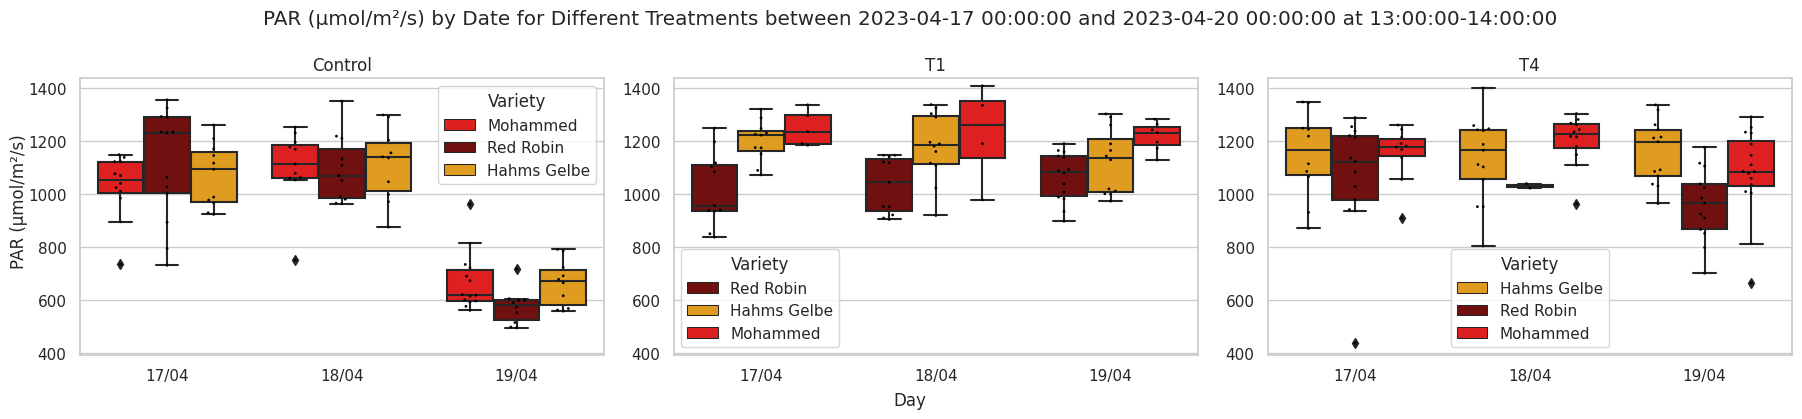

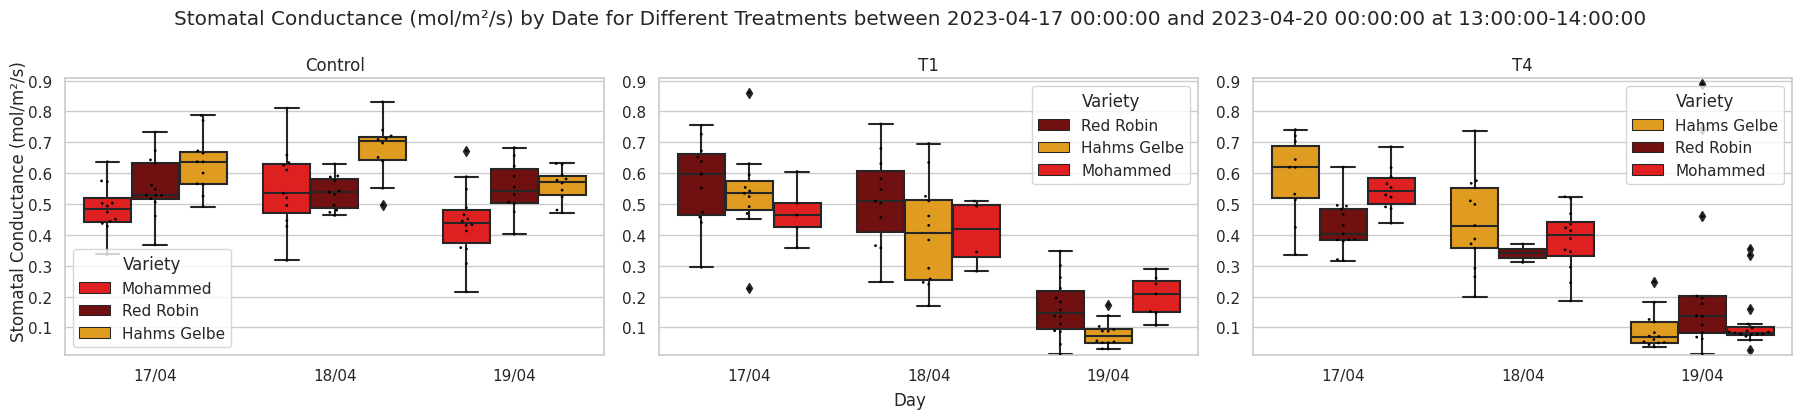

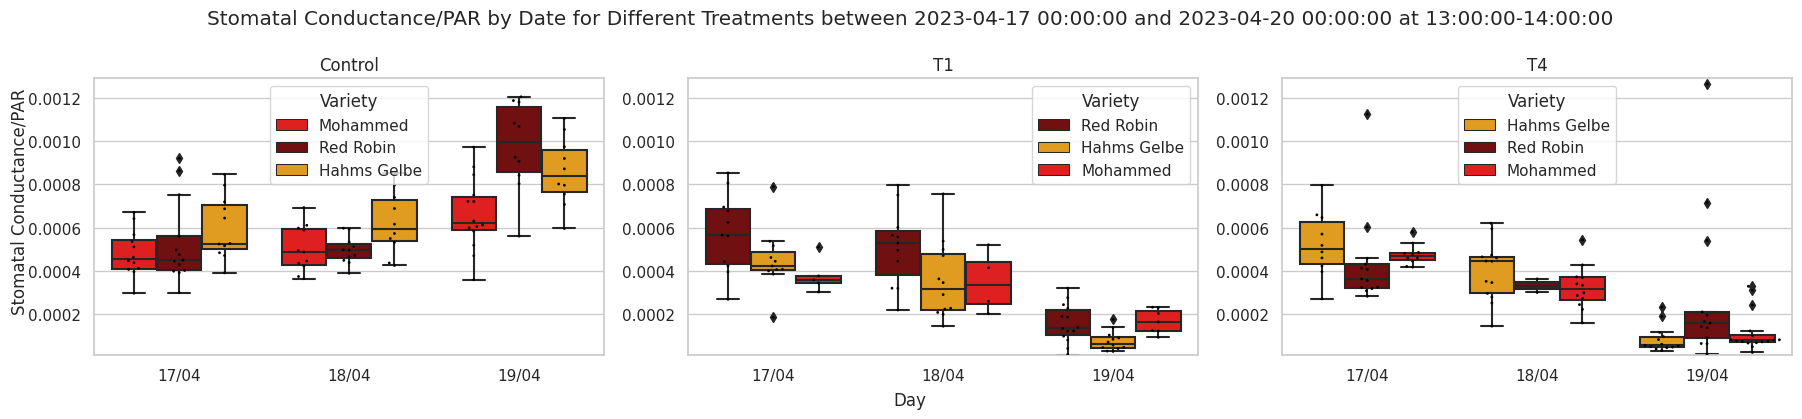

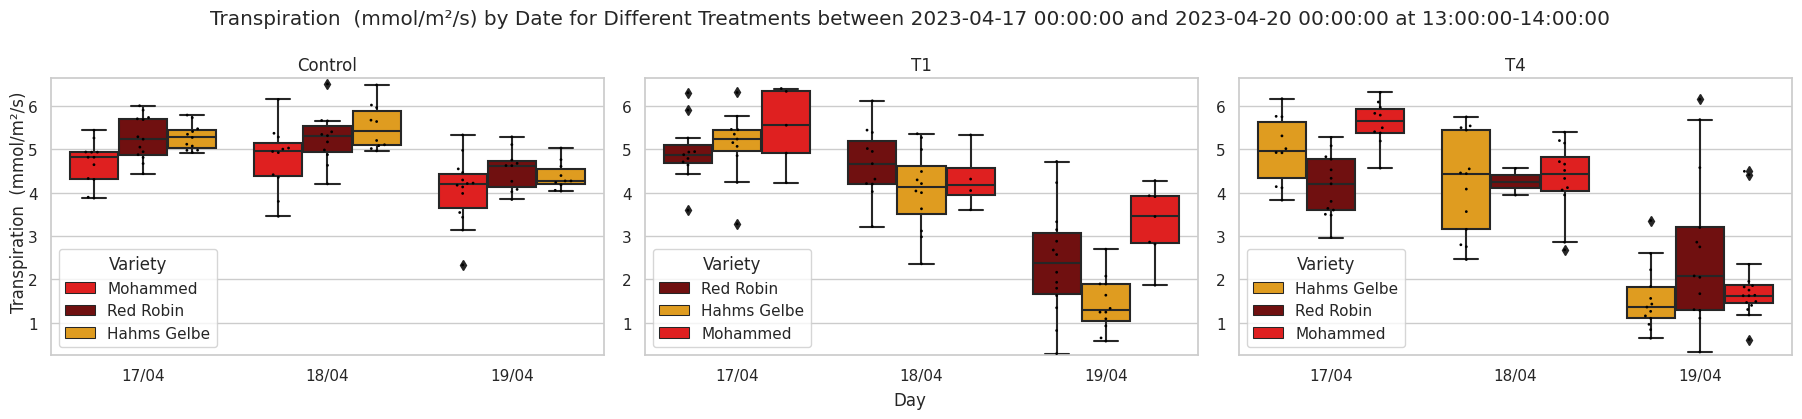

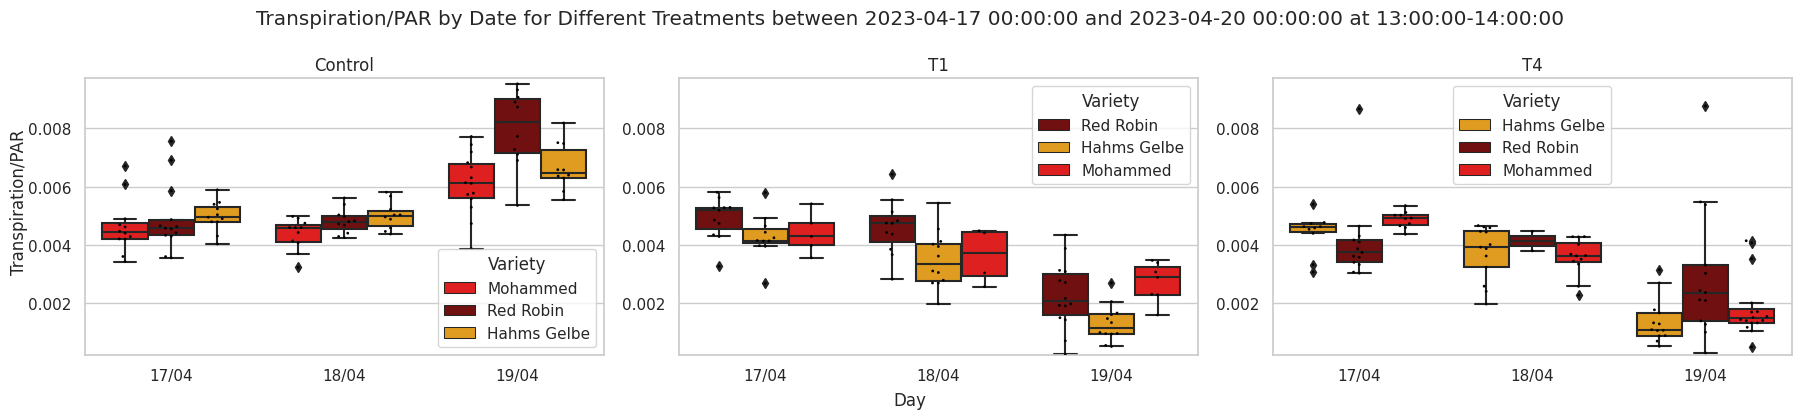

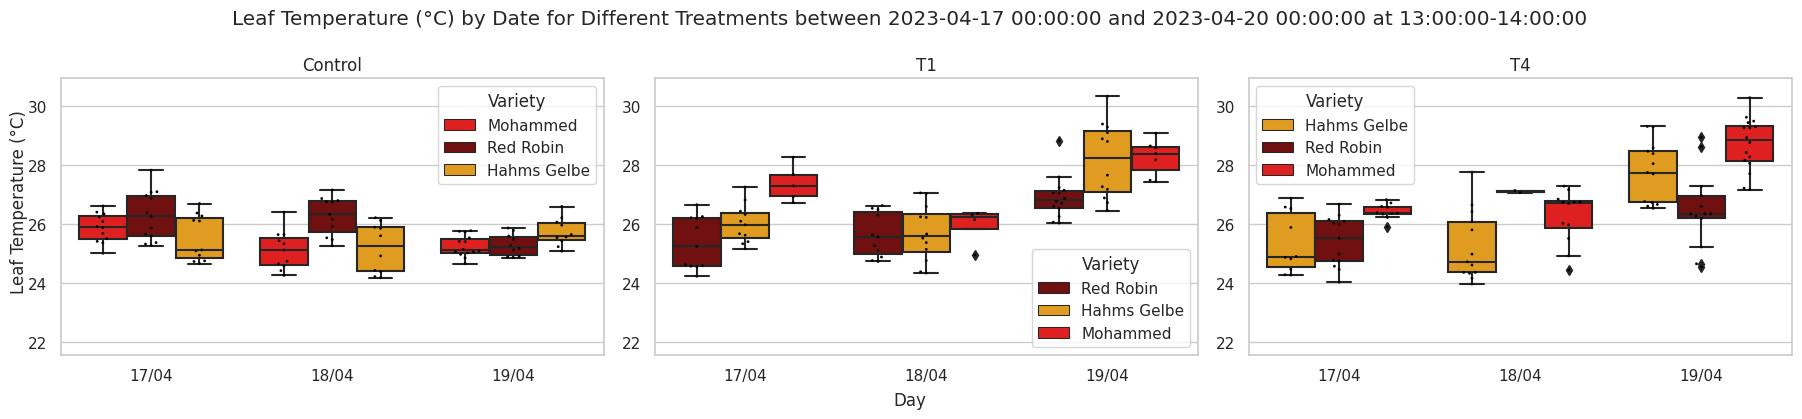

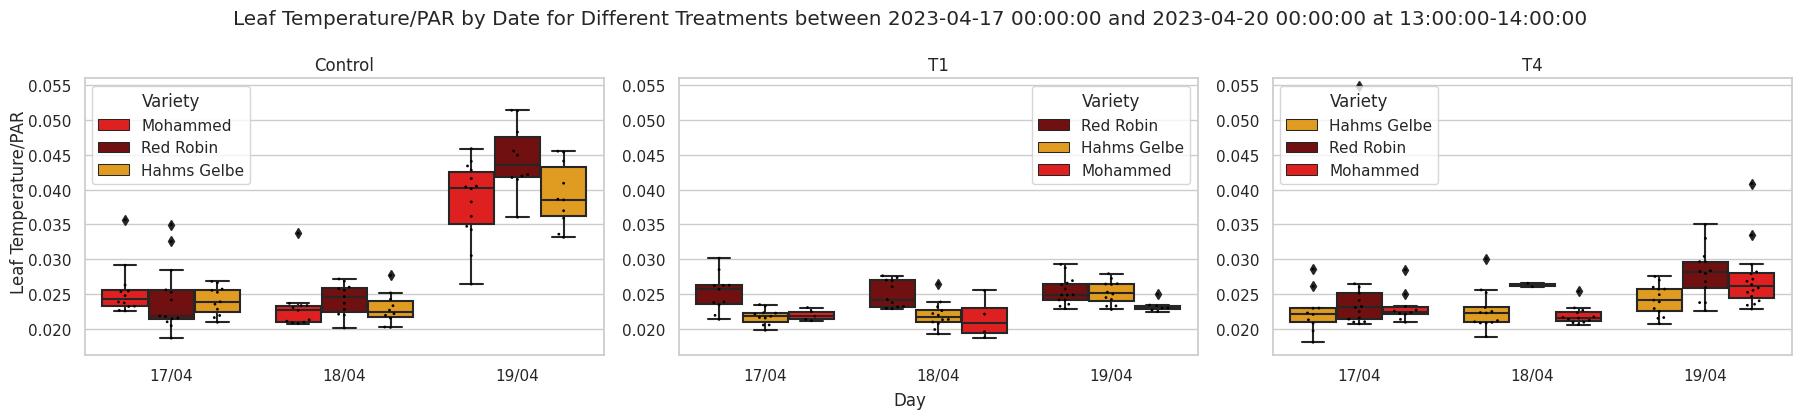

In [175]:
#@title Plotting
features = ['PAR (µmol/m²/s)',
            'Stomatal Conductance (mol/m²/s)',
            'Stomatal Conductance/PAR', 
            'Transpiration  (mmol/m²/s)',
            'Transpiration/PAR',
            'Leaf Temperature (°C)',
            'Leaf Temperature/PAR']

start_hour= '13:00:00' #@param {type:"string"}
end_hour= '14:00:00' #@param {type:"string"}
start_date = '2023-04-17' #@param {type:"string"}
end_date = '2023-04-20' #@param {type:"string"}
plotSwarm = True #@param {type:"boolean"}
plants_to_remove = [1,2,4] # list of plants to remove. let's remove 2, since it had some pre-stress
for feature in features:
  df_t = boxplot_feature(df=df_ana_norm_mean, start_date=start_date, end_date=end_date, feature=feature, hueFeature='Variety', start_hour=start_hour, end_hour=end_hour, swarm=plotSwarm, plants_to_remove=plants_to_remove)
  #print(df_t)

##### Visualization - temporary

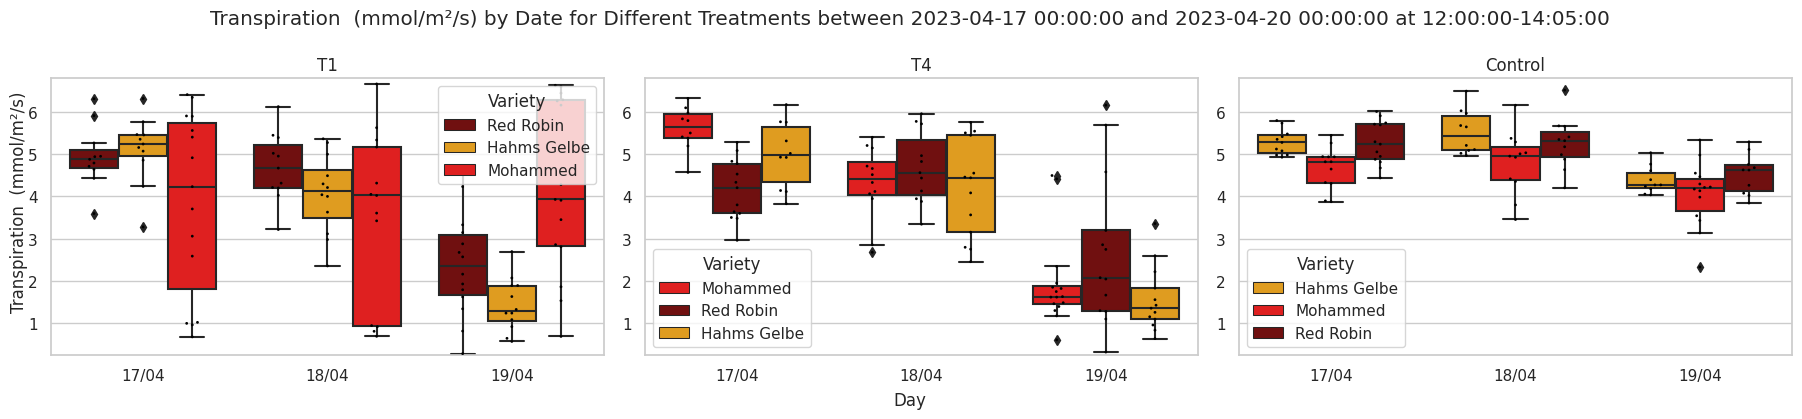

In [169]:
# plots a feature, for example, not a function

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=df_ana_norm_mean.copy()
feature = 'Transpiration  (mmol/m²/s)'
hueFeature = 'Variety'
start_hour= '12:00:00' #@param {type:"string"}
end_hour= '14:05:00' #@param {type:"string"}
start_date = '2023-04-17' #@param {type:"string"}
end_date = '2023-04-20' #@param {type:"string"}
swarm = True #@param {type:"boolean"}

# Convert Timestamp to datetime and set it as the index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# Convert start and end date to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter df according to time range for each date
df = df.loc[(df.index >= start_date) & (df.index <= end_date)].between_time(start_hour, end_hour)
df.index = df.index.floor('D') + pd.to_timedelta(start_hour)

# Sort by Timestamp
df = df.sort_values(by='Timestamp')
df = df.reset_index()





# create subplot with the number of treatments as columns
fig, axs = plt.subplots(nrows=1, ncols=len(treatments), figsize=(6*len(treatments), 4))

max_value = df[feature].max()
min_value = df[feature].min()

# loop through treatments and create subplots
for i, treatment in enumerate(treatments):

    # filter data by treatment
    df_t = df.copy().loc[df['Treatment'] == treatment]

    # convert timestamp to date only
    df_t['Timestamp'] = pd.to_datetime(df_t['Timestamp']).dt.strftime('%d/%m')

    my_palette_box = {"Mohammed": "red", "Hahms Gelbe": "orange", "Red Robin": "maroon"}
    my_palette_swarm = {"Mohammed": "black", "Hahms Gelbe": "black", "Red Robin": "black"}

    # create boxplot and swarmplot in the corresponding subplot
    try:
      sns.boxplot(x='Timestamp', y=feature, data=df_t, ax=axs[i], hue=hueFeature, palette=my_palette_box)
    
      if swarm: sns.swarmplot(x='Timestamp', y=feature, data=df_t, color='black', ax=axs[i], marker=".", size=4, hue=hueFeature, palette=my_palette_swarm, dodge=True, legend=False)
      axs[i].set_xticklabels(df_t['Timestamp'].unique())  # ,rotation=90
      axs[i].set_title(f'{treatment}')
      axs[i].set_xlabel('')
      axs[i].set_ylabel('')
      axs[i].set_ylim(min_value-min_value*0.1, max_value+max_value*0.02)
    except: pass
#add a general xy-axis label
fig.text(0.005, 0.5, feature, ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.02, 'Day', ha='center', va='bottom')

#add a general title for the entire figure
fig.suptitle(f'{feature} by Date for Different Treatments between {start_date} and {end_date} at {start_hour}-{end_hour}')

# adjust subplot spacing
fig.tight_layout()

# show plot
plt.show()



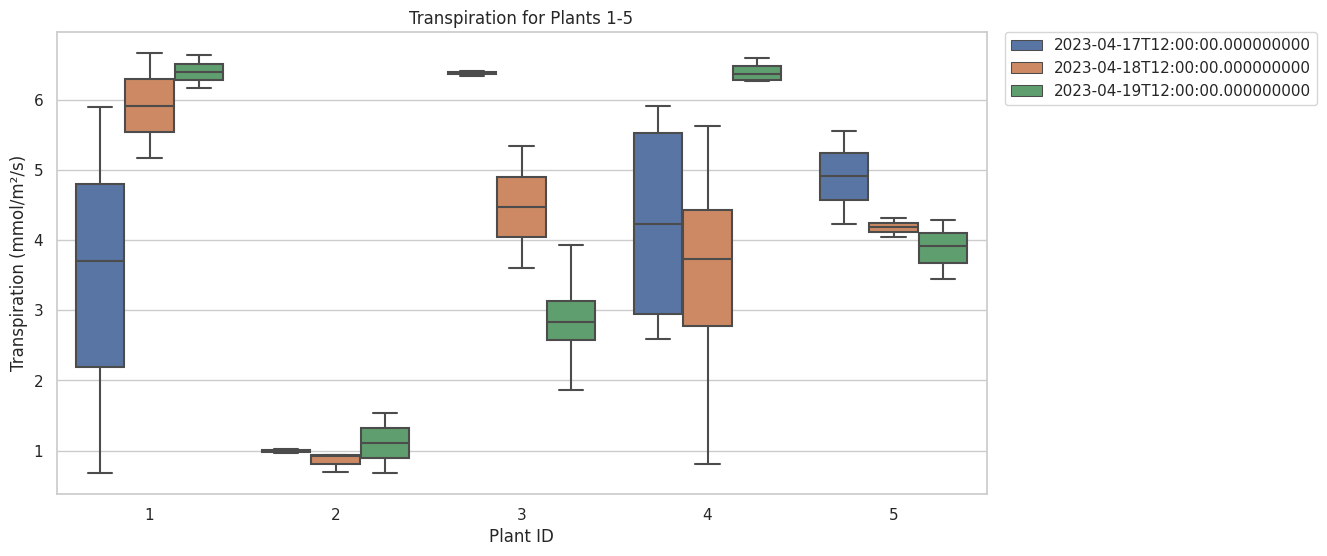

In [170]:
# trying to examine T1 plants 1-5, se which plant is an outliner in adittion to plant 2

import matplotlib.pyplot as plt
import seaborn as sns

plants = [1, 2, 3, 4, 5]
feature = 'Transpiration  (mmol/m²/s)'
df_filtered = df.loc[df['Plant ID'].isin(plants)]

# Group the data by date and plant, and calculate the mean transpiration for each group
grouped = df_filtered.groupby(['Plant ID', df_filtered['Timestamp'].dt.strftime('%Y-%m-%d')])[feature].mean().reset_index()

# Set the plot style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Plant ID', y=feature, hue='Timestamp', data=df_filtered)

# Set the legend outside the plot
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Set the axis labels and title
plt.xlabel('Plant ID')
plt.ylabel('Transpiration (mmol/m²/s)')
plt.title('Transpiration for Plants 1-5')

plt.show()


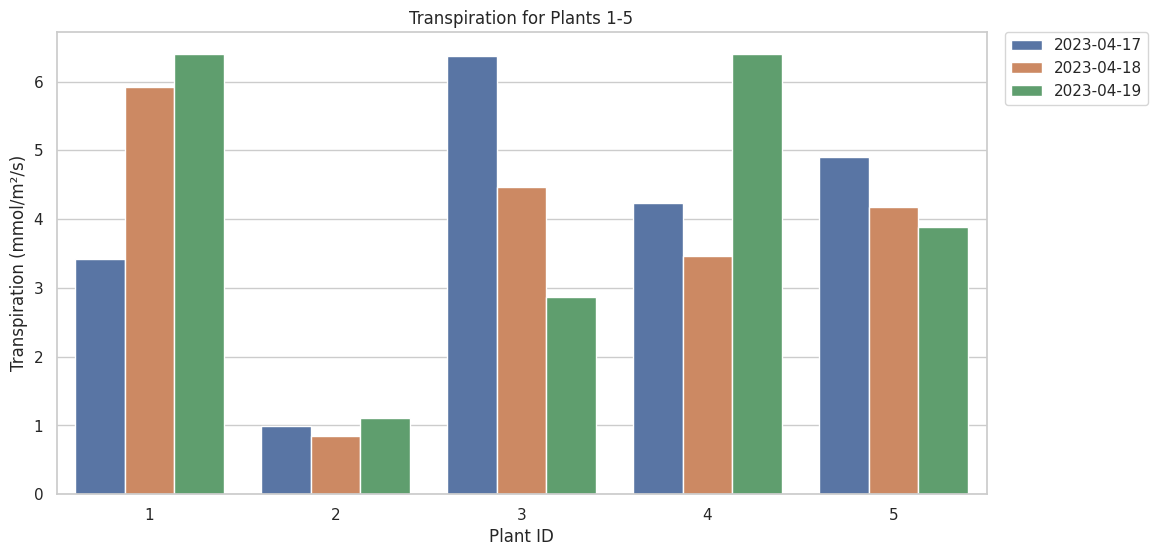

In [172]:
# trying to examine T1 plants 1-5, se which plant is an outliner in adittion to plant 2

import matplotlib.pyplot as plt
import seaborn as sns

plants = [1, 2, 3, 4, 5]
feature = 'Transpiration  (mmol/m²/s)'
df_filtered = df.loc[df['Plant ID'].isin(plants)]

# Group the data by date and plant, and calculate the mean transpiration for each group
grouped = df_filtered.groupby(['Plant ID', df_filtered['Timestamp'].dt.strftime('%Y-%m-%d')])[feature].mean().reset_index()

# Set the plot style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Plant ID', y=feature, hue='Timestamp', data=grouped)

# Set the legend outside the plot
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Set the axis labels and title
plt.xlabel('Plant ID')
plt.ylabel('Transpiration (mmol/m²/s)')
plt.title('Transpiration for Plants 1-5')

plt.show()


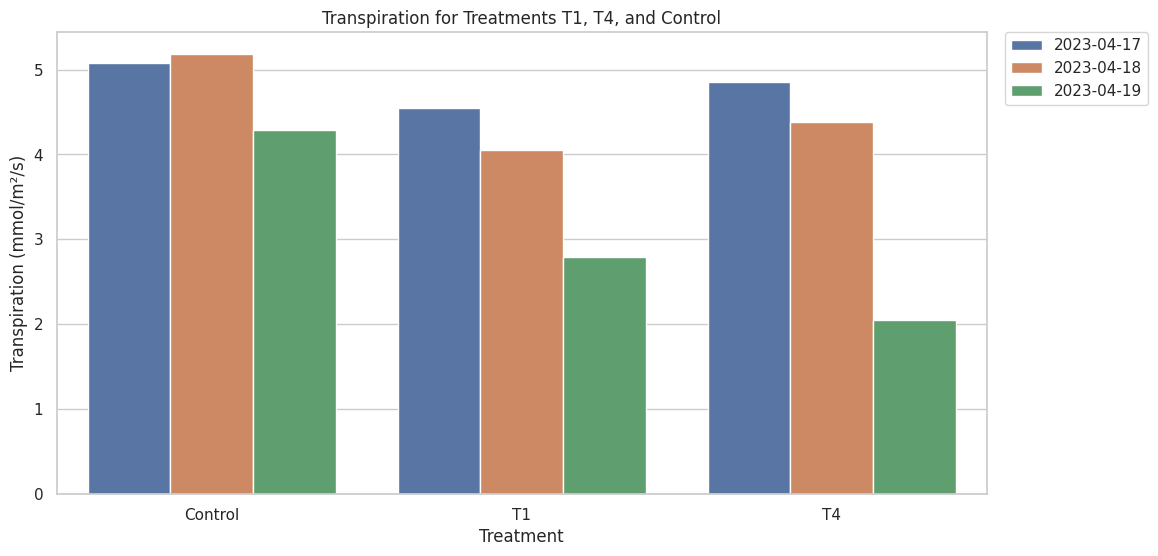

In [171]:
# trying to examine T1 plants 1-5, se which plant is an outliner in adittion to plant 2

import matplotlib.pyplot as plt
import seaborn as sns

treatments = ['T1', 'T4', 'Control']
feature = 'Transpiration  (mmol/m²/s)'
df_filtered = df.loc[df['Treatment'].isin(treatments)]

# Group the data by date and treatment, and calculate the mean transpiration for each group
grouped = df_filtered.groupby(['Treatment', df_filtered['Timestamp'].dt.strftime('%Y-%m-%d')])[feature].mean().reset_index()

# Set the plot style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Treatment', y=feature, hue='Timestamp', data=grouped)

# Set the legend outside the plot
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Set the axis labels and title
plt.xlabel('Treatment')
plt.ylabel('Transpiration (mmol/m²/s)')
plt.title('Transpiration for Treatments T1, T4, and Control')

plt.show()


In [54]:
df_ana_norm_mean.to_csv('ana_norm_mean.csv', index=False)


In [55]:
df_t.to_csv('df-new.csv', index=False)


## TODO




*   Understand the trends in the gsw and E before and after irrigation failures
*   Analyse thermal images

